### Detect the outliers and remove it using: 
##### 1.Percentile method
##### 2.IQR(Inter quartile range method)
##### 3.Normal distribution
##### 4.Zscore method

In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [5]:
df.dtypes

location           object
size               object
total_sqft        float64
bath                int64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [6]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [7]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [8]:
df.duplicated().value_counts()

False    12151
True      1049
Name: count, dtype: int64

In [3]:
df1=df.drop_duplicates()
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258


In [10]:
df1.duplicated().value_counts()
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258


## 1. Using mean function method

In [4]:
df1.price_per_sqft.mean()

8132.641840177763

In [5]:
df1.price_per_sqft.median()

5500.0

There is a significant difference in mean and median indicating the presence of outliers

<Axes: xlabel='price', ylabel='Count'>

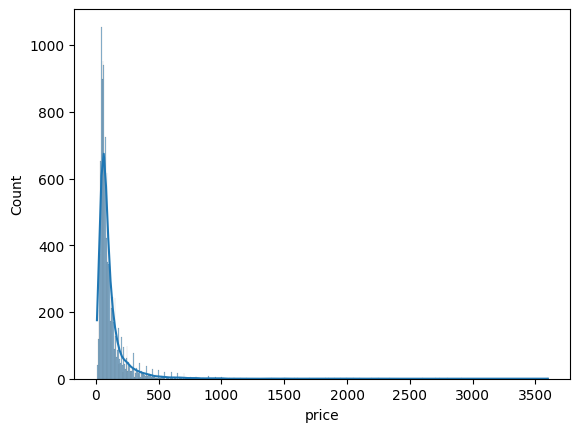

In [6]:
sns.histplot(data=df1,x=df1.price,kde=True)

In [27]:

df1.price_per_sqft.skew()

103.90203228991889

In [30]:

kurtosis(df1['price_per_sqft'],fisher=False)

11134.230839805388

Skewness and curtosis values are not within the range  therfore presence of outliers conformed

## 2. Using Percentile method

In [7]:
df1.price.quantile([0.25,0.30,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.76,0.78,0.80,0.82,0.85,0.90,0.92,0.95,0.96,0.97,0.98])

0.25     50.000
0.30     55.000
0.40     63.860
0.45     68.000
0.50     74.000
0.55     79.675
0.60     86.800
0.65     95.000
0.70    108.000
0.75    123.500
0.76    125.000
0.78    133.000
0.80    140.000
0.82    150.000
0.85    170.000
0.90    225.000
0.92    252.000
0.95    329.000
0.96    365.000
0.97    415.000
0.98    500.000
Name: price, dtype: float64

There is a  change in 85th and 90th quantile indicating the presence of outliers

### Rows with outliers

In [8]:
df1[df1.price>df1.price.quantile(0.85)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6,Old Airport Road,4 BHK,2732.0,4,204.0,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4,600.0,4,18181
9,other,6 Bedroom,1020.0,6,370.0,6,36274
11,Whitefield,4 Bedroom,2785.0,5,295.0,4,10592
18,other,3 BHK,2770.0,4,290.0,3,10469
...,...,...,...,...,...,...,...
13173,Sarjapur Road,4 BHK,2425.0,5,195.0,4,8041
13185,Hulimavu,1 BHK,500.0,1,220.0,1,44000
13195,Whitefield,5 Bedroom,3453.0,4,231.0,5,6689
13196,other,4 BHK,3600.0,5,400.0,4,11111



There are18090 rows containing outlier values

In [9]:
df1_nooutliers = df1[df1.price<df1.price.quantile(0.85)]
df1_nooutliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13189,Yeshwanthpur,3 BHK,1675.0,3,92.13,3,5500
13190,Rachenahalli,2 BHK,1050.0,2,52.71,2,5020
13192,Bellandur,2 BHK,1262.0,2,47.00,2,3724
13194,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530


#####  there is a significant change after 85th quantile,so consider the values present after 85th quantile as outliers. So we can remove them from the dataset.the remaining dataset is displayed above

<Axes: xlabel='price', ylabel='Count'>

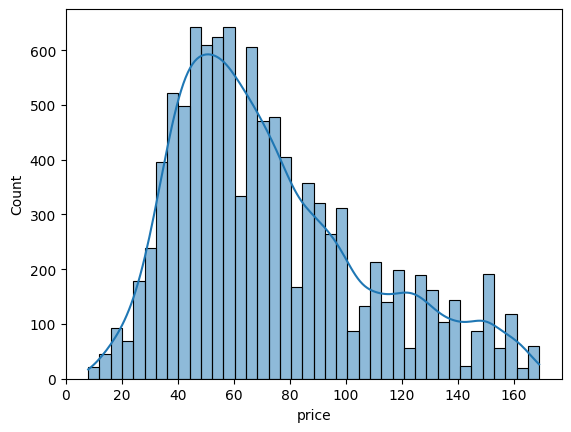

In [10]:
sns.histplot(data=df1_nooutliers,x=df1_nooutliers.price,kde=True)

## 3. IQR

In [18]:
q1 =df1.price_per_sqft.quantile(0.25)
q1

4312.0

In [19]:
q3 =df1.price_per_sqft.quantile(0.75)
q3

7461.0

In [20]:
iqr = q3-q1
iqr

3149.0

### Lower & Upper whisker

In [21]:
lower_whisker = q1-1.5*iqr
lower_whisker

-411.5

In [22]:
upper_whisker = q3+1.5*iqr
upper_whisker

12184.5

In [23]:
df1[(df1.price_per_sqft<411.5) | (df1.price_per_sqft>12184.5)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4,600.0,4,18181
9,other,6 Bedroom,1020.0,6,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1,130.0,2,16250
...,...,...,...,...,...,...,...
13114,other,3 BHK,1903.0,2,293.0,3,15396
13141,other,3 Bedroom,2000.0,2,360.0,3,18000
13142,other,2 BHK,1140.0,1,185.0,2,16228
13157,other,7 Bedroom,1400.0,7,218.0,7,15571


Values  before lower whisker and after upper whisker are considered outliers

### Removing outliers

In [24]:
df_no3 =df1[(df1.price_per_sqft>411.5)&(df1.price_per_sqft<12184.5)]
df_no3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258


In [25]:
df_no3.price_per_sqft.mean()

5680.316434995912

In [26]:
df_no3.price_per_sqft.median()

5252.0

<Axes: xlabel='price_per_sqft', ylabel='Count'>

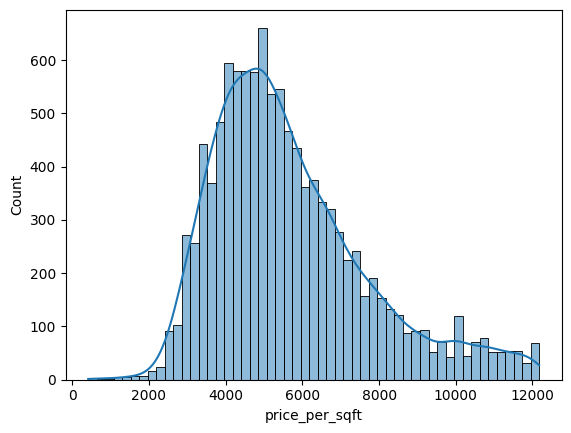

In [27]:
sns.histplot(data=df_no3,x=df_no3.price_per_sqft,kde=True)

In [29]:
import scipy
from scipy.stats import skew,kurtosis

In [29]:
df_no3.price_per_sqft.skew()

0.9814398659792147

In [30]:
kurtosis(df_no3['price_per_sqft'],fisher =False)

3.713960247419514

####  mean and median are almost the same , it indicates that outliers are removed. new dataset the graph obtained is almost similar to normally distributed  with skewness less than 1 and kurtosis close to 3

## 4. Normal Distribution

<Axes: xlabel='price_per_sqft', ylabel='Count'>

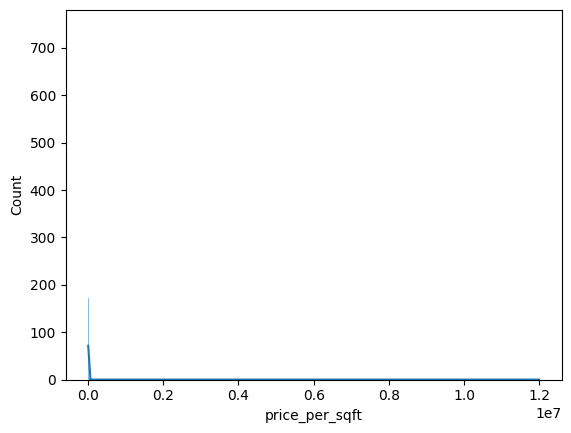

In [40]:
sns.histplot(data=df1,x=df1.price_per_sqft,kde=True)

In [32]:
mean=df1.price_per_sqft.mean()
mean

8132.641840177763

In [33]:
std=df1.price_per_sqft.std()
std

111232.90089570847

In [34]:
N_sigma =mean-3*std
N_sigma

-325566.06084694766

In [35]:
P_sigma =mean+3*std
P_sigma

341831.3445273032

#### Removing outlierss

In [36]:
df_no2=df[(df.price_per_sqft>N_sigma) & (df.price_per_sqft<P_sigma)]
df_no2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


<Axes: xlabel='price_per_sqft', ylabel='Count'>

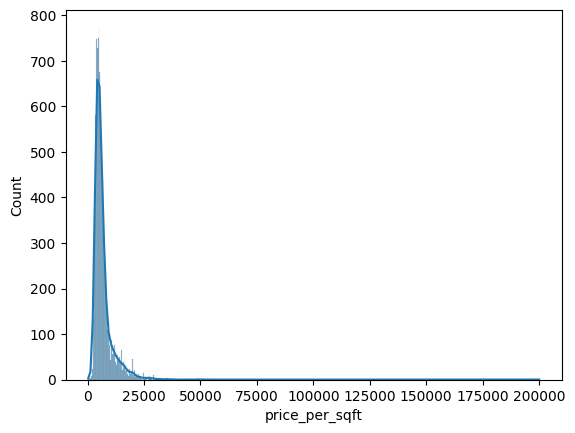

In [37]:
sns.histplot(data=df_no2,x=df_no2.price_per_sqft,kde=True)

In [38]:
df_no2.price_per_sqft.skew()

10.477808563841766

In [39]:
kurtosis(df_no2["price_per_sqft"],fisher=False)

316.5273648918721

use the logrithamic transformation of the column price_per_sqft

<Axes: xlabel='price_per_sqft', ylabel='Count'>

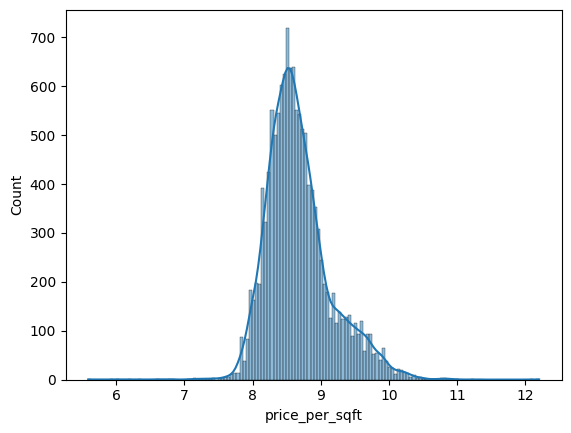

In [41]:
sns.histplot(data=df_no2,x=np.log(df_no2.price_per_sqft),kde=True)

In [43]:
np.log(df_no2.price_per_sqft.skew())

2.349259550523435

In [45]:
kurtosis(np.log(df_no2["price_per_sqft"]),fisher=False)

4.9122296910750824

 we obtained a graph with skewness greater than 1 and kurtosis greater than 3 which is  Leptokurtic curve

## 5. Z-Score

In [49]:
df1["Zscore"] =(df.price_per_sqft-mean)/std
df1

C:\Users\akhil\AppData\Local\Temp\ipykernel_18784\1500090260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Zscore"] =(df.price_per_sqft-mean)/std


,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.034906
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530,-0.014408
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5,400.00,4,11111,0.026776
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.025843


### Removing outliers

In [52]:
dfno4=df1[(df1.Zscore>-3)&(df1.Zscore<3)]
dfno4

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.039859
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.031624
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.034411
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.016970
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.034906
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530,-0.014408
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,-0.012979
13196,other,4 BHK,3600.0,5,400.00,4,11111,0.026776
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.025843


#### Removed 5 outliers 

<Axes: xlabel='price_per_sqft', ylabel='Count'>

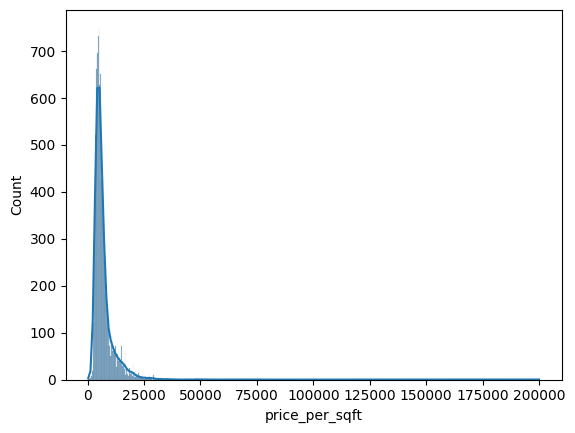

In [54]:
sns.histplot(data=dfno4,x=dfno4.price_per_sqft,kde=True)

In [55]:
dfno4.price_per_sqft.skew()

10.522738553105086

In [56]:
kurtosis(np.log(dfno4["price_per_sqft"]),fisher=False)

4.853764316108764

<Axes: xlabel='price_per_sqft', ylabel='Count'>

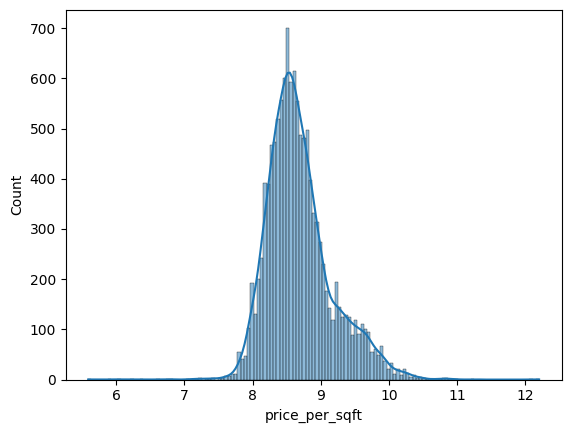

In [58]:
sns.histplot(data=dfno4,x=np.log(dfno4.price_per_sqft),kde=True)

In [60]:
np.log(dfno4.price_per_sqft).skew()

0.8479649839006448

In [61]:
kurtosis(np.log(dfno4["price_per_sqft"]),fisher=False)

4.853764316108764

#### Kurtosis value is greater than 3 therefore it is Leptokurtic curve

## Correlation Matrix

In [16]:
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258



Drop non-numerical columns

In [20]:
df2=df1.drop(["location","size"],axis=1)
df2

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2,39.07,2,3699
1,2600.0,5,120.00,4,4615
2,1440.0,2,62.00,3,4305
3,1521.0,3,95.00,3,6245
4,1200.0,2,51.00,2,4250
...,...,...,...,...,...
13194,1715.0,3,112.00,3,6530
13195,3453.0,4,231.00,5,6689
13196,3600.0,5,400.00,4,11111
13197,1141.0,2,60.00,2,5258


In [22]:

corr1=df2.corr()
corr1

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.386694,0.572516,0.339936,-0.008877
bath,0.386694,1.000000,0.448802,0.898875,0.030133
price,0.572516,0.448802,1.000000,0.390008,0.027415
bhk,0.339936,0.898875,0.390008,1.000000,0.030294
price_per_sqft,-0.008877,0.030133,0.027415,0.030294,1.000000


<Axes: >

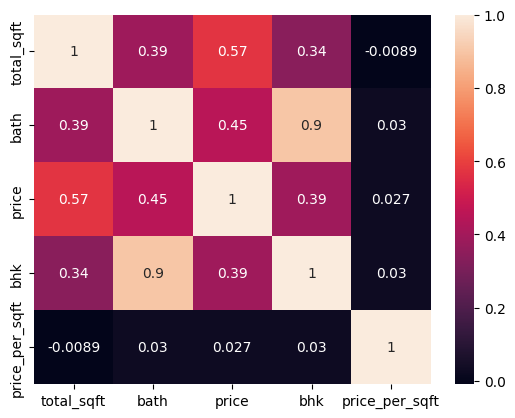

In [23]:

sns.heatmap(corr1,annot=True)

 A heat map for all the numerical columns and observed that the attributes "bath" and "bhk" are highly correlated with value of correlatio coefficient 0.9. And the attributes "price per sqft" and "total sqfl" are the least correlated with a negative correlation coefficient -0.0089.

## Scatter plot

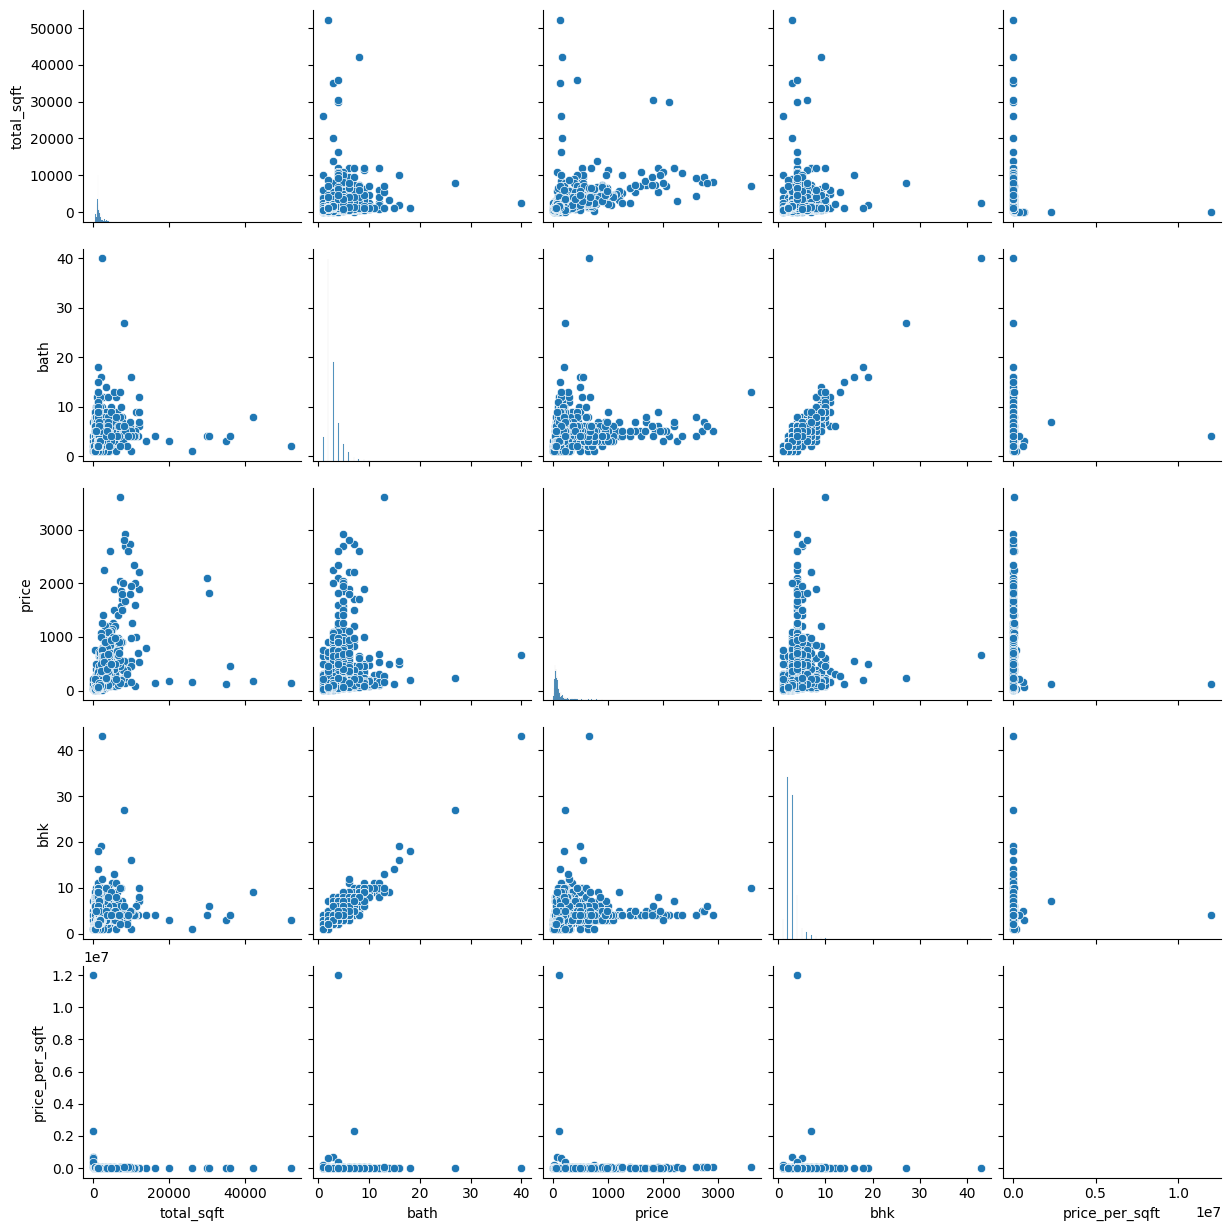

In [24]:

sns.pairplot(df1)
plt.show()

## Box plot

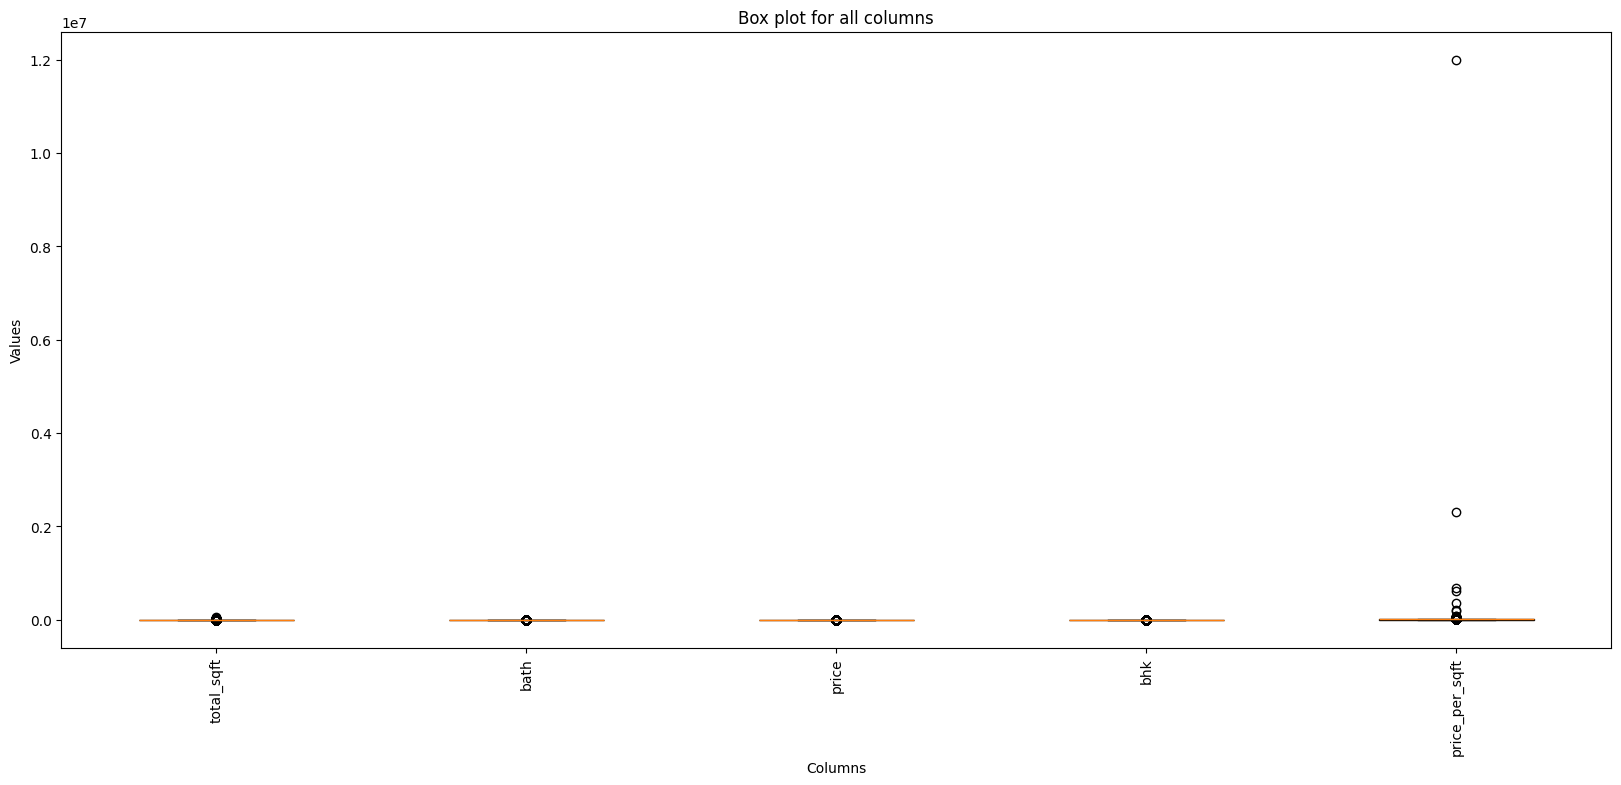

In [25]:

plt.figure(figsize=(20, 8))
plt.title("Box plot for all columns")
plt.boxplot(df2.values, patch_artist=True, labels=df2.columns)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90) 
plt.show()

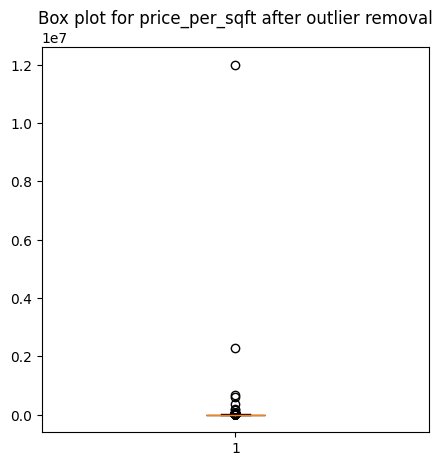

In [26]:

plt.figure(figsize=(5,5))  
plt.title("Box plot for price_per_sqft after outlier removal")
plt.boxplot(df2["price_per_sqft"], patch_artist=True)
plt.show()